<IPython.core.display.Javascript object>


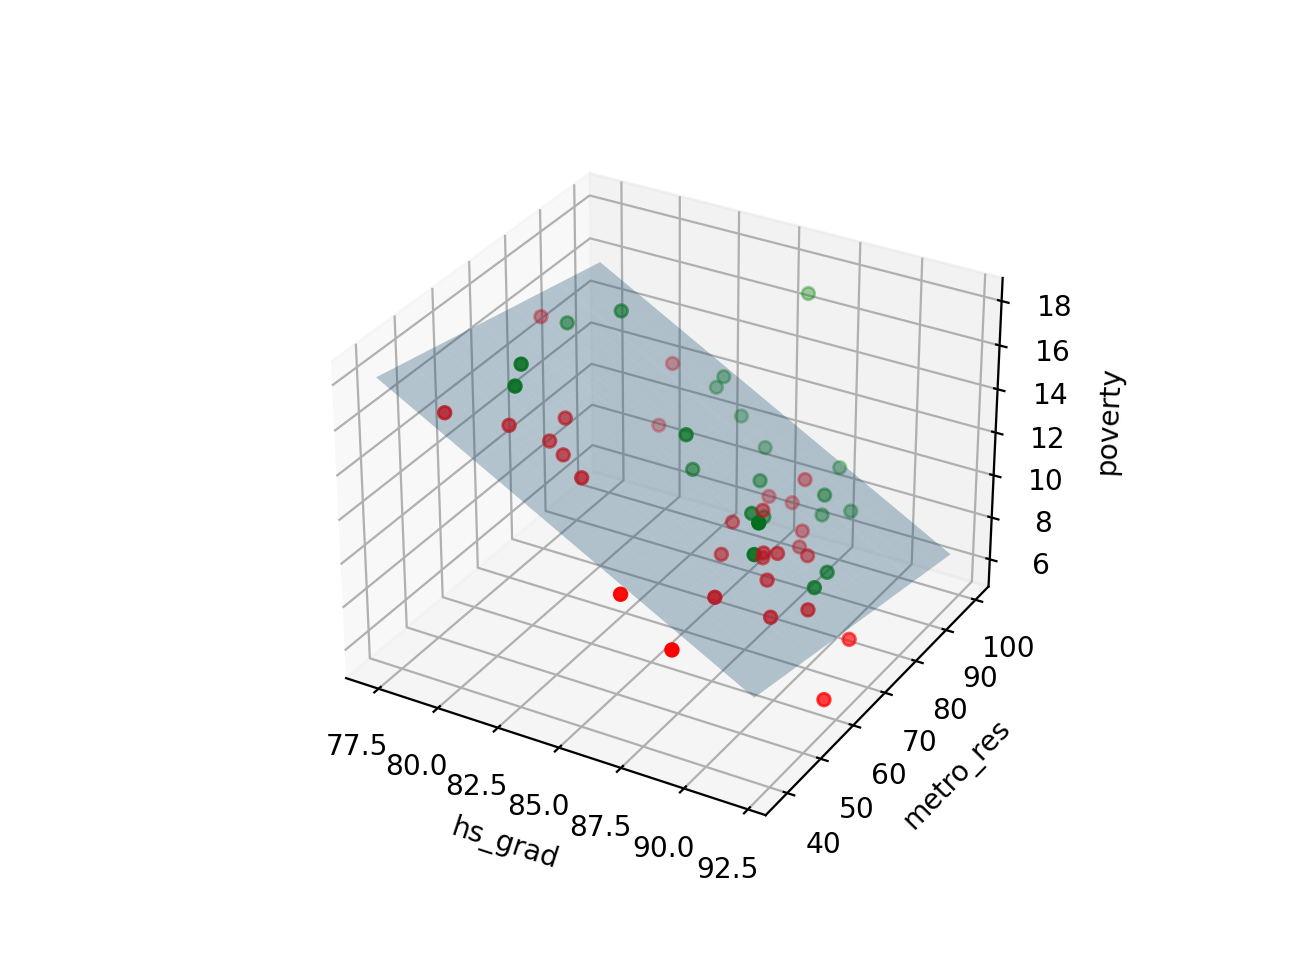

Text(0.5, 0, 'poverty')

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

data = pd.read_csv(r'D:\DataSets\Stepik Courses Data\states.csv')

data.head()

lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

<IPython.core.display.Javascript object>


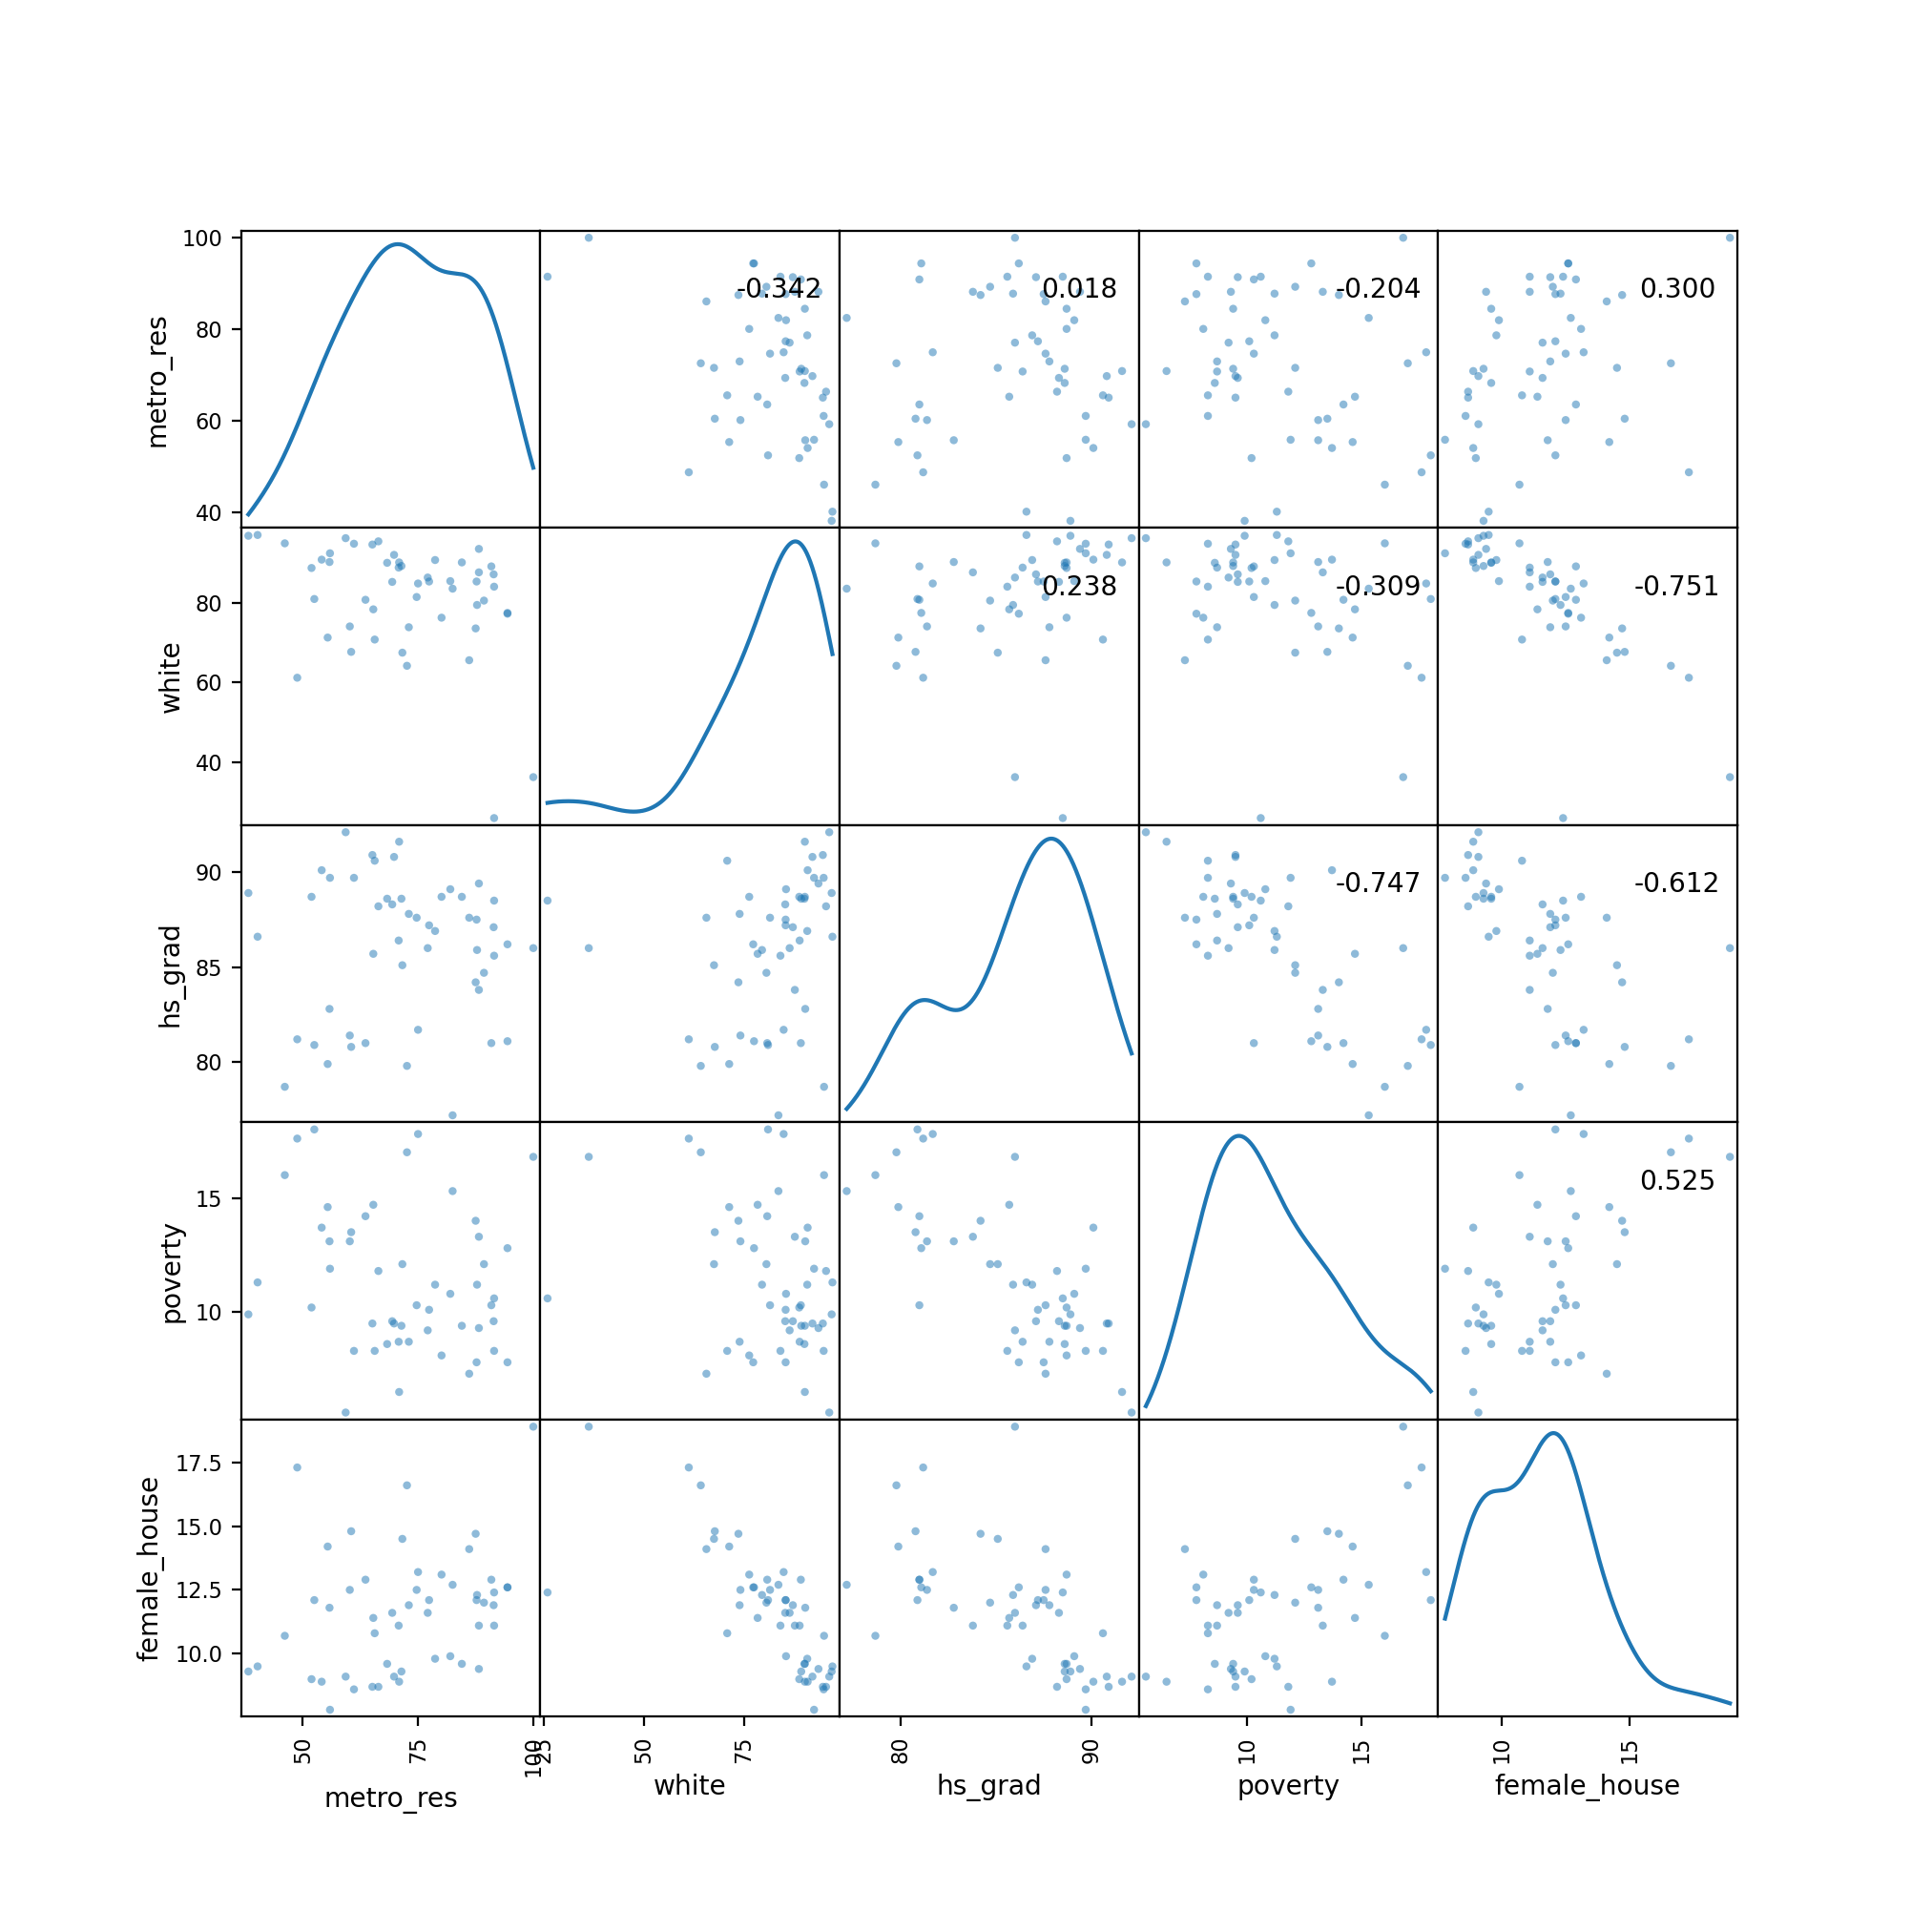

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

<IPython.core.display.Javascript object>


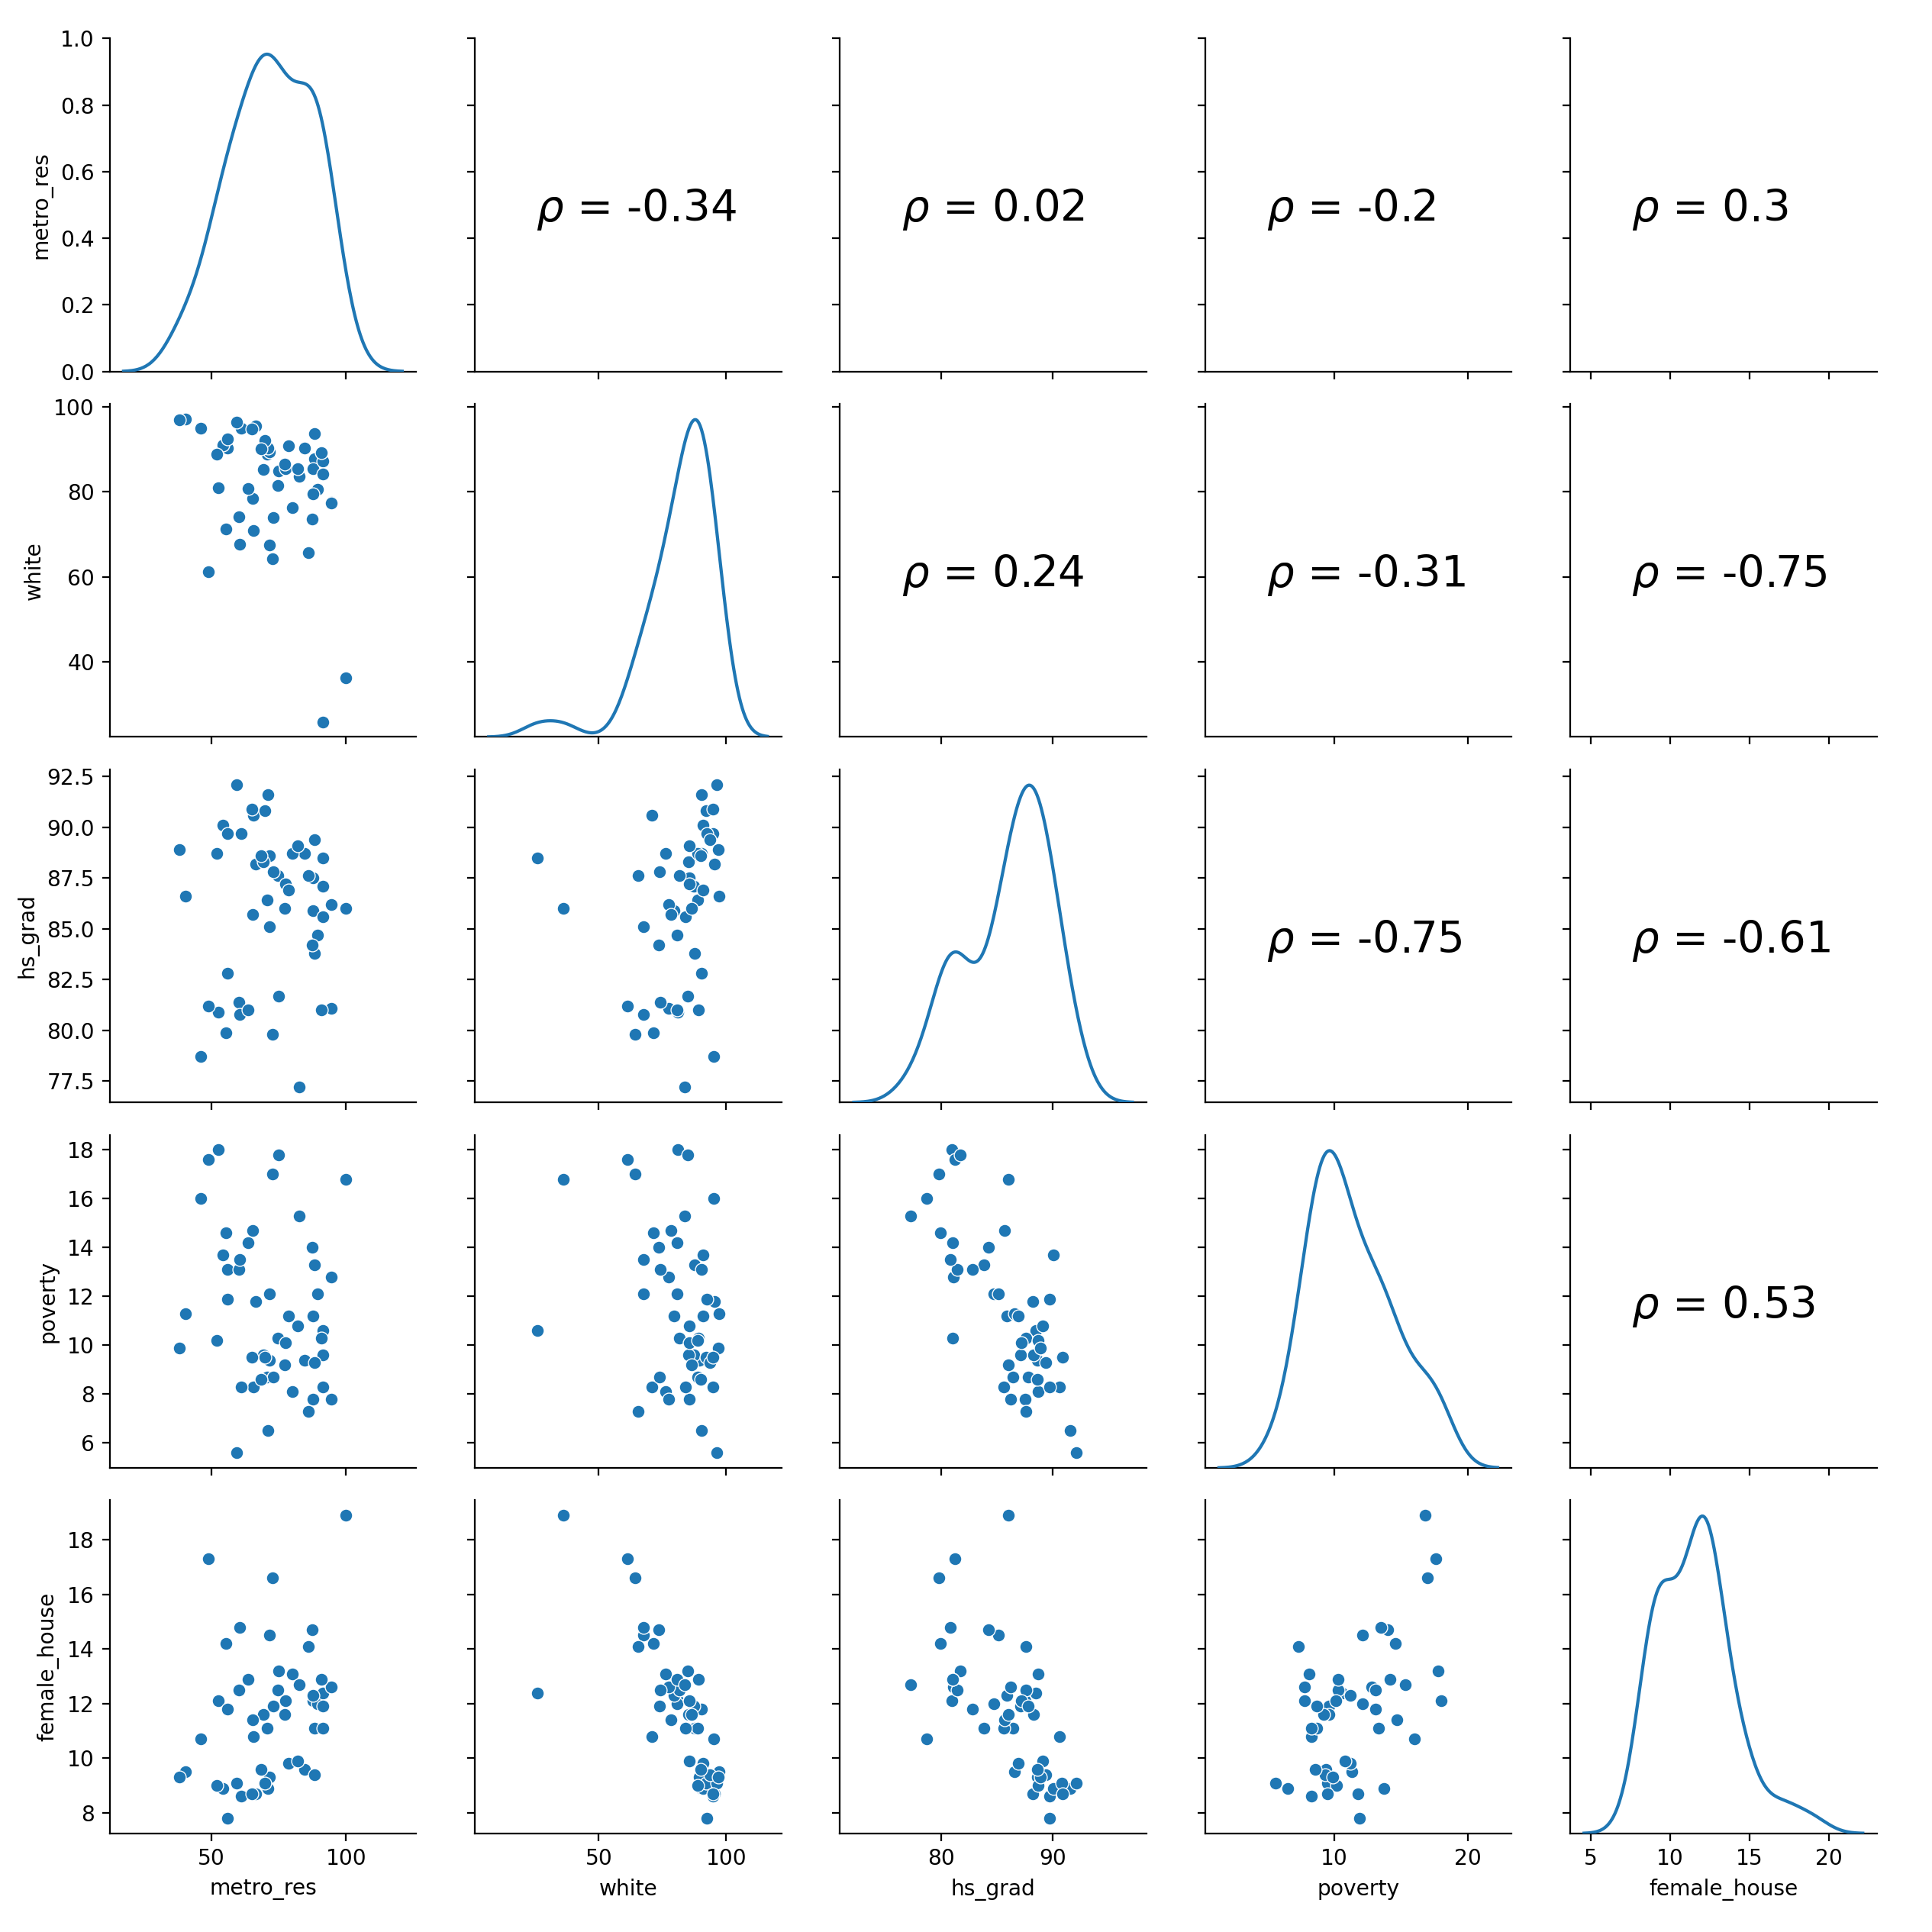

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(data, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)


In [9]:
# Найдём такой набор фичей, что R-squared максимальна
feats = {'metro_res', 'white', 'hs_grad', 'female_house'}

# Рекурсивно переберём все сочетания переменных
def brute_force(params: set, formula: str, result: set) -> str:
    if not params:
        result.add(formula.lstrip('+ '))
        return 
    else:
        new_params = params.copy()
        for el in params:
            new_params.remove(el)

            brute_force(new_params, formula + ' + ' + el, result)
            brute_force(new_params, formula, result)

res = set()          
brute_force(feats, '', res)
res.remove('')

# Теперь посчитаем Adjusted R-Square для каждого сочетания и выведем на экран
for formula in res:
    lm = smf.ols(formula='poverty ~ ' + formula, data=data).fit()
    print(f'{lm.rsquared_adj:.2}', formula)

0.55 hs_grad
0.077 white
0.62 metro_res + hs_grad + white
0.55 hs_grad + white + female_house
0.022 metro_res
0.61 metro_res + hs_grad + white + female_house
0.6 metro_res + hs_grad + female_house
0.56 hs_grad + white
0.26 white + female_house
0.4 metro_res + female_house
0.58 metro_res + hs_grad
0.55 hs_grad + female_house
0.17 metro_res + white
0.39 metro_res + white + female_house
0.26 female_house
